In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import scipy.cluster.hierarchy as ch
from scipy.stats import pearsonr
# Set style and Color
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

### Load the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/customer_data.csv',low_memory = False)

# Display Customer Data 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Get more information about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Statistical Analysis of customer data 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Missing Values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Unique Values from Gender Column
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# Count of each gender 
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Data Visualization

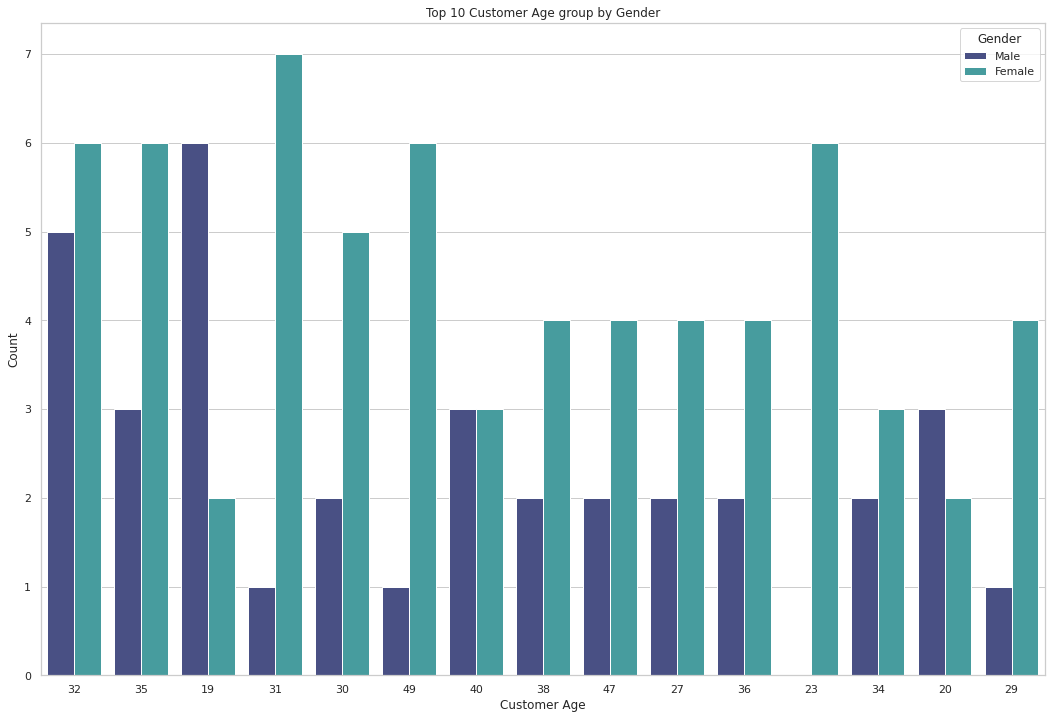

In [10]:
# Top 10 Customer's Age by Gender with most spending
plt.figure(figsize=(18,12))
sns.countplot(x='Age',data=df,palette='mako',order=df['Age'].value_counts().index[0:15],hue='Gender')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title("Top 10 Customer Age group by Gender")

plt.show()

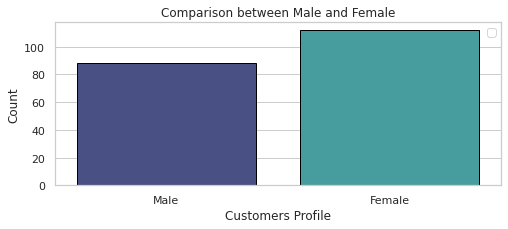

In [15]:
# Comparison between Male and Female
plt.figure(figsize=(8,3))
sns.countplot(x='Gender',data=df,palette='mako',linewidth=1,edgecolor='black')
plt.xlabel('Customers Profile')
plt.ylabel('Count')
plt.title('Comparison between Male and Female')
plt.legend()
plt.show()

<Figure size 4400x4000 with 0 Axes>

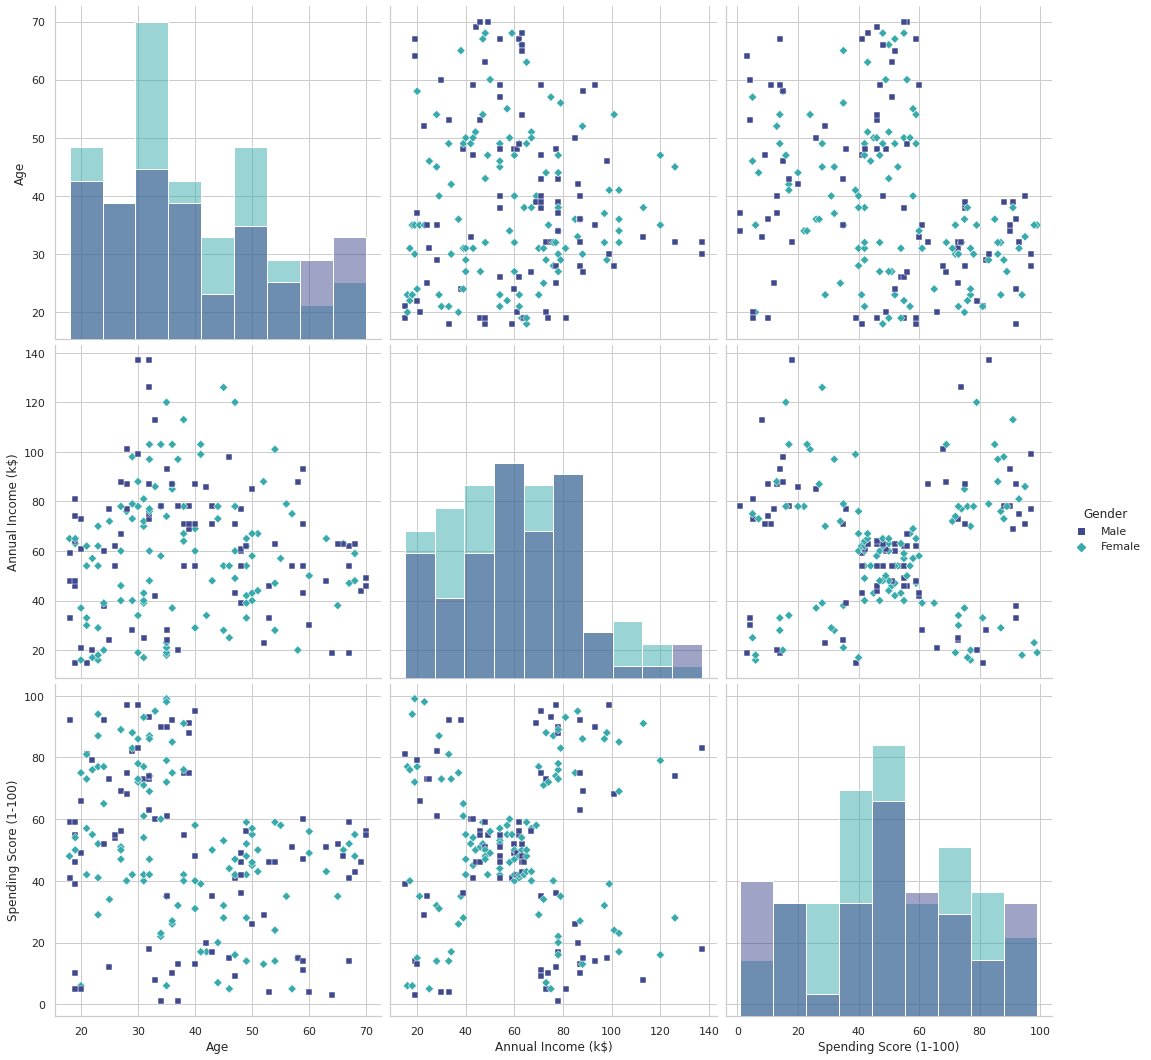

In [16]:
# Detailed Analysis ( pairplot - hist)
plt.figure(figsize=(22,20),dpi=200)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="hist",markers=["s", "D"],height=5)

plt.show()

<Figure size 4400x4000 with 0 Axes>

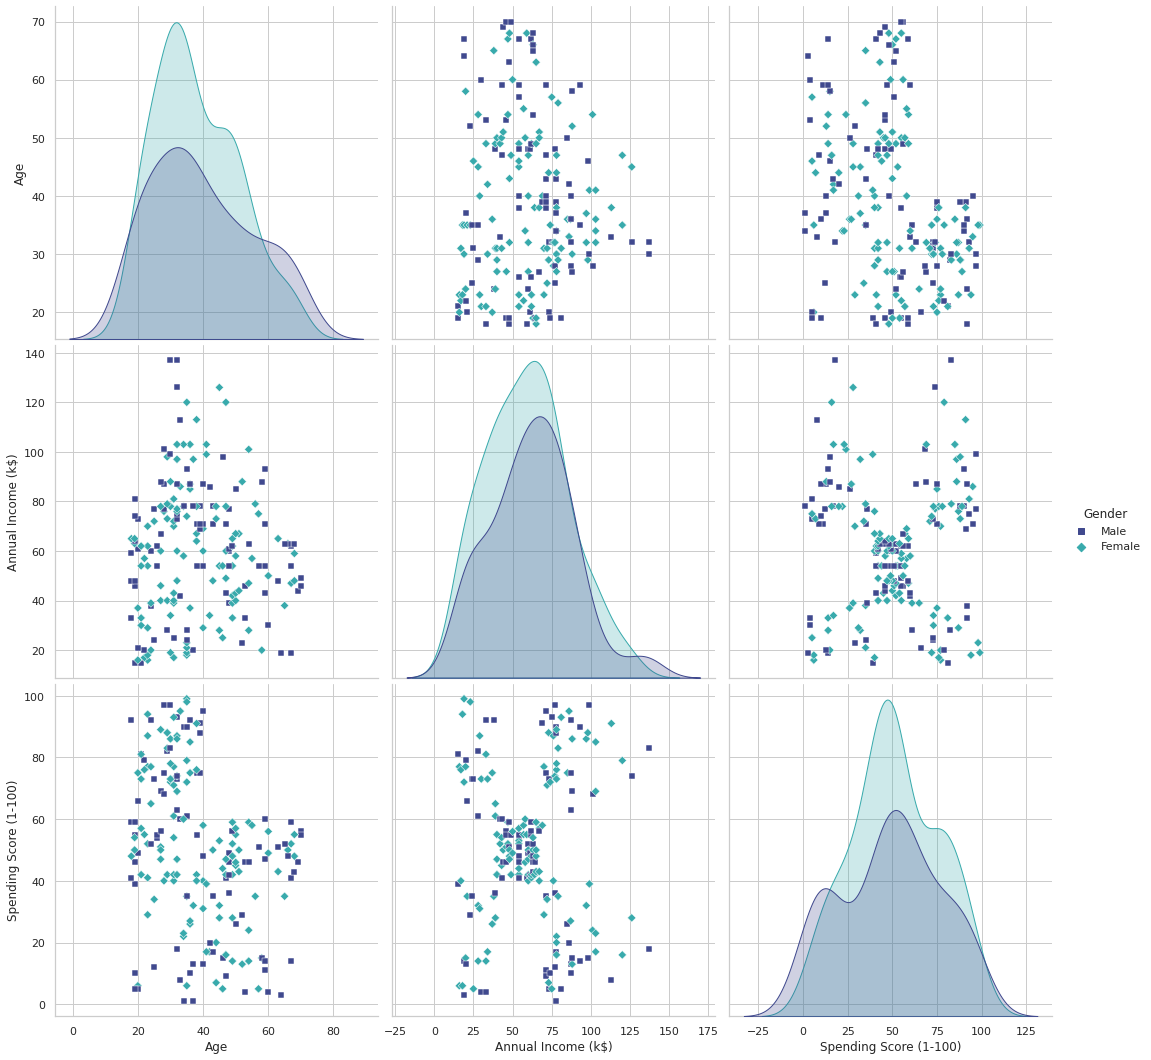

In [17]:
# Detailed Analysis ( kde)
plt.figure(figsize=(22,20),dpi=200)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="kde",markers=["s", "D"],height=5)

plt.show()

<Figure size 4400x4000 with 0 Axes>

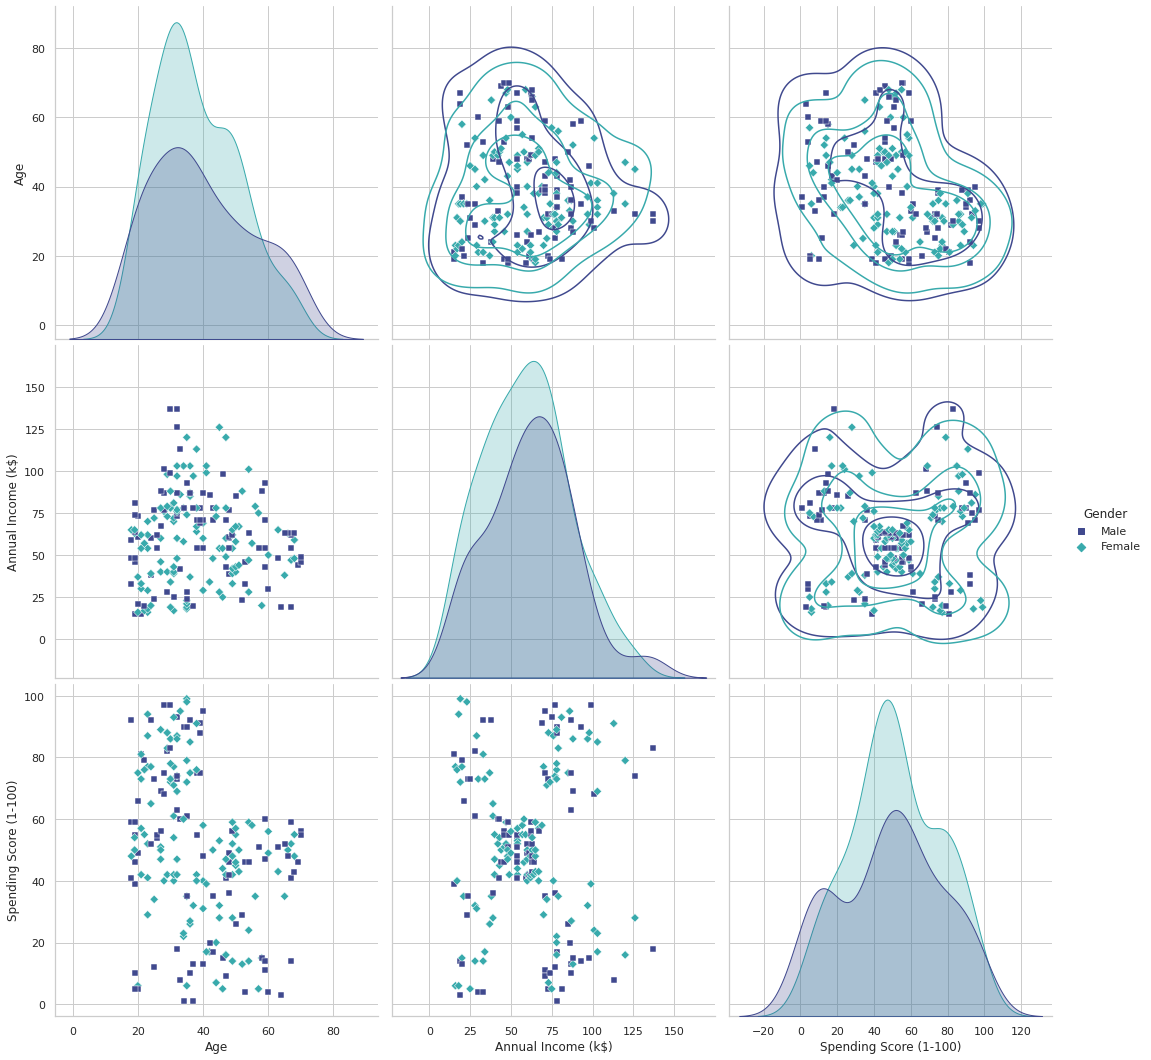

In [18]:

# Detailed Analysis ( KDE )
plt.figure(figsize=(22,20),dpi=200)
g=sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="kde",markers=["s", "D"],height=5)
g.map_upper(sns.kdeplot, levels=4, color=".2")

plt.show()

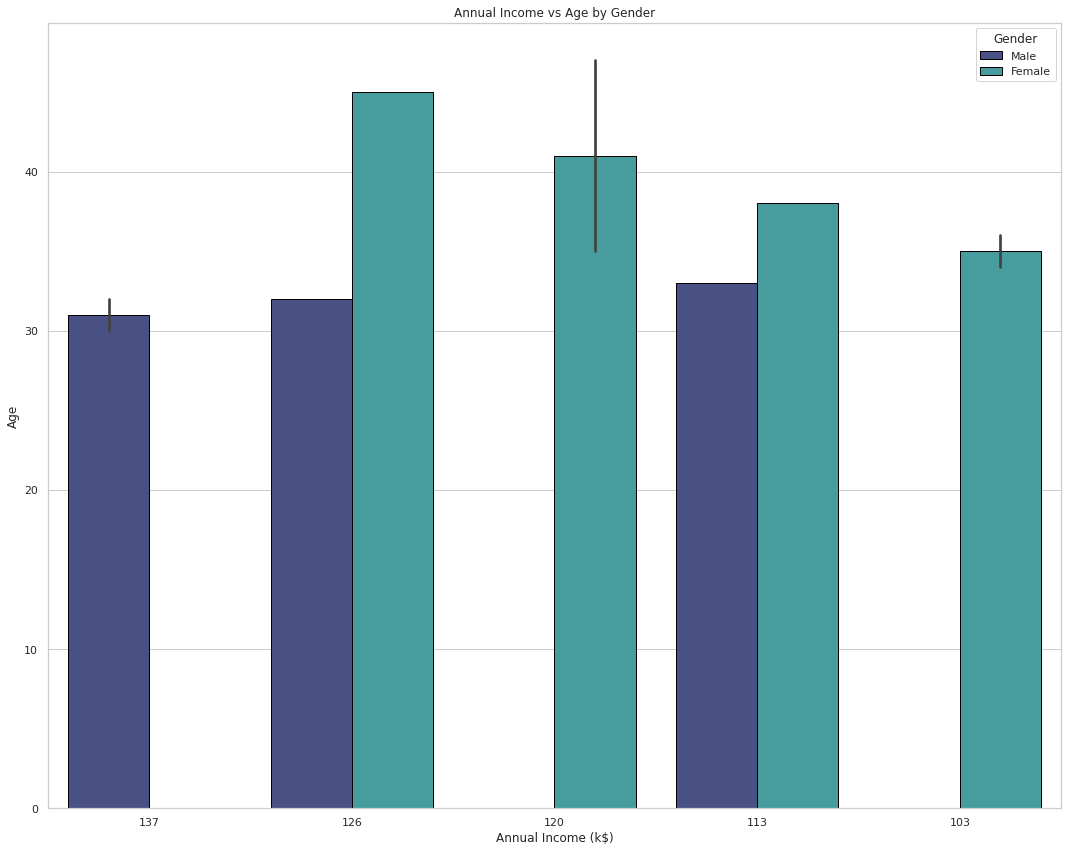

In [19]:
# Annual Income vs Age by Gender
c_df=df.sort_values('Annual Income (k$)',ascending = False).head(10)
plt.figure(figsize=(15,12))
sns.barplot(x='Annual Income (k$)',y='Age',data=c_df, order=c_df['Annual Income (k$)'].value_counts().index,hue='Gender',edgecolor='black',palette='mako')
plt.title('Annual Income vs Age by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

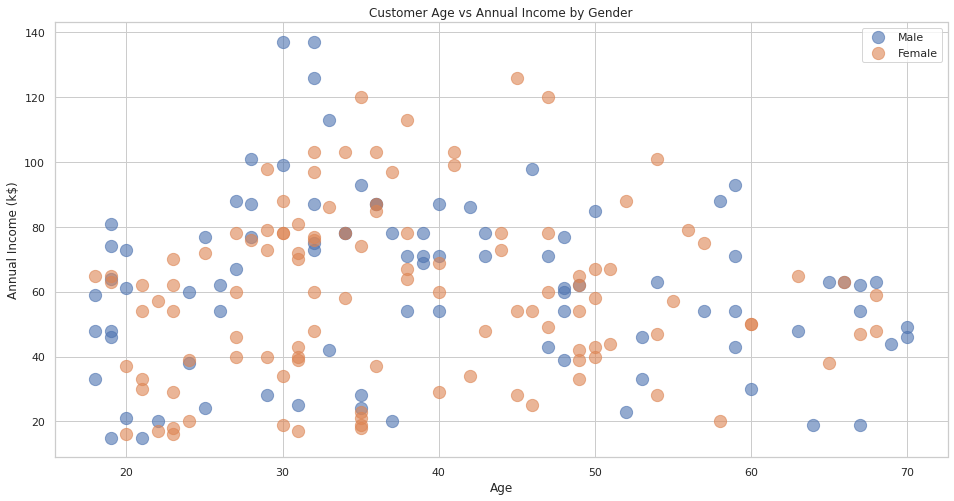

In [20]:
# Comparison Age vs Annual Income by Gender
plt.figure(figsize=(16,8))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender'] == gender],label=gender,s=150,alpha=0.6)
    
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Customer Age vs Annual Income by Gender')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


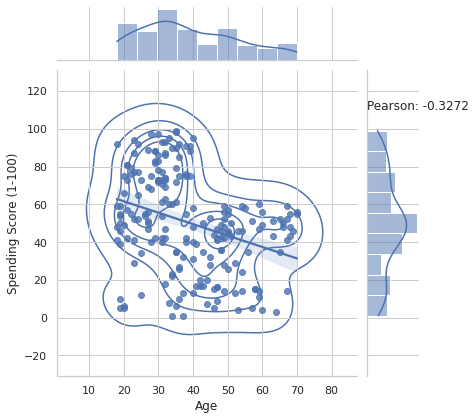

In [21]:
# Pearson's correlation between Age and Spending Score
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
t = (sns.jointplot('Age', 'Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


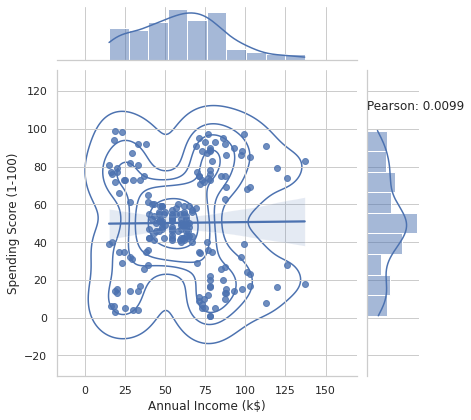

In [22]:
# Pearson's correlation between Annual Income and Spending Score
corr, _ = pearsonr(df['Annual Income (k$)'], df['Spending Score (1-100)'])
t = (sns.jointplot('Annual Income (k$)', 'Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


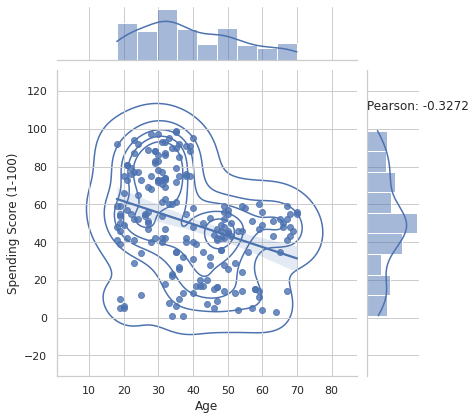

In [23]:
# Pearson's correlation between Annual Income and Age
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
t = (sns.jointplot('Age', 'Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()

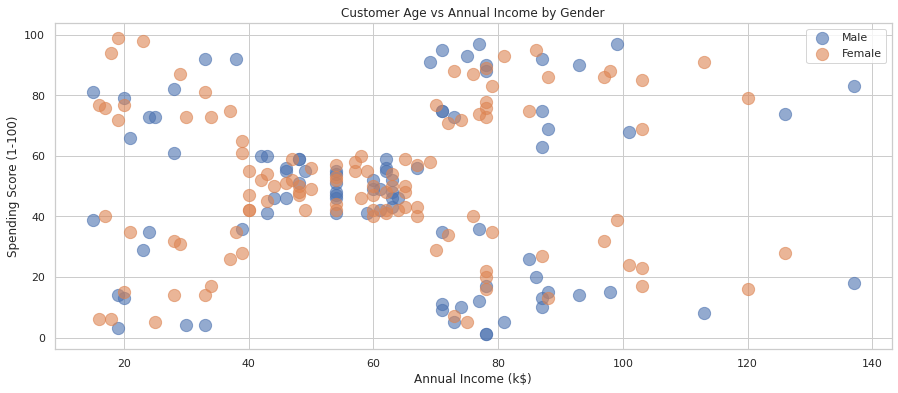

In [24]:
# Comparison Annual Income vs Spending Score (1-100) by Gender
plt.figure(figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender'] == gender],label=gender,s=150,alpha=0.6)
    
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Customer Age vs Annual Income by Gender')
plt.legend()

plt.show()

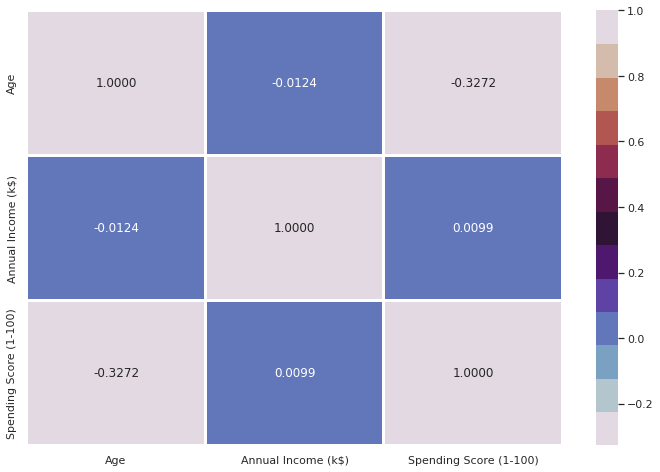

In [25]:
# Heatmap to see correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('CustomerID',axis=1).corr(),annot=True,cmap=colors1,fmt='.4f',linewidth=2)
plt.show()